This notebook shows you how to deal with las file

In [2]:
#pip install lasio
import lasio
file_name = "caliper.las"
las = lasio.read(file_name)

In [5]:
# view the version of the las file
las.version

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STANDA"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="ONE LINE PER DEPTH STE")]

In [ ]:
header = las.well
for h in header:
    print("Property: ",h["mnemonic"], "  Unit= ", h["unit"])

In [ ]:
# Curves..
curves = las.curves

for c in curves:
    print("Curve Name =", c["mnemonic"])
    print(c.data)

In [ ]:
df  = las.df()
# lets reset the index...
df.reset_index(inplace=True)
df

In [ ]:
df.describe()
#Describe statistical informatino about the log file.

In [ ]:
df.describe().T
# trasnposing the description...

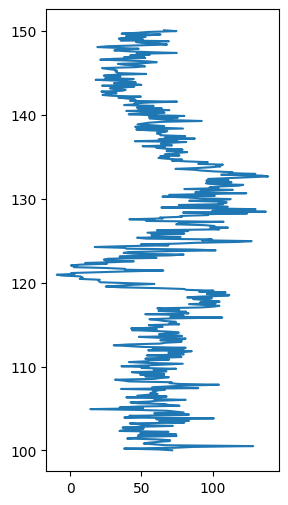

In [3]:
# lets plot the las file
import matplotlib.pyplot as plt
plt.figure(figsize=(3,6))
# accessing depth
depth = las.depth_m
depth = las["DEPT"]
depth = las.curves["DEPT"]
plt.plot(las["GR"]-20, las.depth_ft /3.28 )

In [68]:

# creating actual well log plots.
import matplotlib.pyplot as plt
import numpy
%matplotlib qt

def customize_xaxis(axis, user_color="black", label_text = "  ", spine_pos = 1):
    # lets move every thing to the top:   
    # 1- label xlabel
    # 2- ticks
    # 3-ticklabel
    # 4-spine (the bar, line on the axis.)
    axis.tick_params(axis="x", top=True, bottom=False, 
                        labeltop=True, labelbottom=False,
                        color=user_color, labelcolor=user_color)
    axis.set_xlabel(label_text, color=user_color)
    axis.xaxis.set_label_position("top")
    axis.grid()
    # it sets the color of the line/bar
    axis.spines.top.set_color(user_color)
    # sets the width of the bar/line
    axis.spines.top.set_linewidth(1.3)
    # the relative position of the spine,   x = 500 y =400,  positon = x * 1.1,  
    axis.spines.top.set_position( ("axes", spine_pos) )


fig, ax =  plt.subplots(nrows=1, ncols=5,figsize=(8,12), sharey=True)
to_plot_list = ["GR",    "CAL",  "DENS",  "DTP"]
color_list =       ["green", "black","red", "magenta"]

for var in to_plot_list:
    index = to_plot_list.index(var)
    # do plotting
    c = color_list[index]
    ax[index].plot(las[var], las.depth_m, color = c , lw = 1, ls="solid")
    # lw = line width , pixels
    # ls = line style    --,   ..,  solid
    customize_xaxis(ax[index], c, var)

# vshale = gr - min_gr /  (max_gr- min_gr)  
min_gr = las["GR"].min()
max_gr = las["GR"].max()
mean_gr = las["GR"].mean()
#calculate Vshale using 2 different methods
las["Vshale"] = (las["GR"] - min_gr)/(max_gr - min_gr)
las["Vshale-Larionov"] = 0.33 * ( (2**(2 * las["Vshale"])) -1)
ax[4].plot(las["Vshale"], las.depth_m)
ax[4].plot(las["Vshale-Larionov"], las.depth_m)
customize_xaxis(ax[4],"red","Vshale Calculation")
#Adding Caliper log to GR track...
cal_at_gr = ax[0].twiny()
cal_at_gr.plot( las["CAL"]/25.6, las.depth_m, color="olive", ls="dotted", lw=2)
#create a bit line(bit size line)
cal_at_gr.vlines(4.5, las.depth_m.min(), las.depth_m.max(), color="black", ls="dashed", label="Bit Size")
#Create a baseline for shale.
ax[0].vlines(120,  las.depth_m.min(), las.depth_m.max(), label="Shale Line", color="black", lw=1)
ax[0].legend()


#creating filing between two curves.
ax[1].vlines(120, las.depth_m.min(), las.depth_m.max(), color="black", lw=0.5)
ax[1].fill_betweenx(las.depth_m,  las["CAL"], 120, color="yellow", where= las["CAL"] >= 120)
ax[1].fill_betweenx(las.depth_m,  las["CAL"], 120, color="green", where= las["CAL"] < 120)

#cal_at_gr.legend()
cal_at_gr.spines.top.set_linestyle("dashed")
customize_xaxis(ax[0], "green","GR")
customize_xaxis(cal_at_gr, "olive", "Caliper", 1.05)
#create
ax[0].invert_yaxis()
#fig.savefig("simple_logfile.pdf")

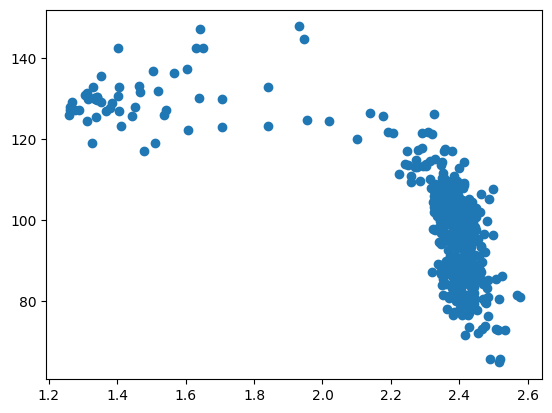

In [48]:
#Creating A Cross Plot
import matplotlib.pyplot as plt2

plt2.scatter(las["DENS"], las["DTP"])